In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv('Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4324,4325,15577970,Alexeeva,489,France,Male,34,5,0.0,1,0,0,43540.59,0
8920,8921,15697546,McIntyre,570,France,Female,36,3,0.0,2,1,0,92118.75,0
5171,5172,15760849,Nwachukwu,537,France,Male,39,2,0.0,2,1,1,137651.60,0
2457,2458,15641629,P'eng,537,Spain,Female,38,1,0.0,2,0,1,41233.97,0
3053,3054,15610140,He,601,France,Female,34,5,0.0,2,1,0,27022.57,0


In [7]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)
df.Gender = df.Gender.map({'Female':0,'Male':1})
df = pd.get_dummies(data=df, columns=['Geography'])
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9047,652,1,41,9,159434.03,1,1,0,178373.93,0,0,1,0
8449,637,0,33,9,113913.53,1,0,1,65316.50,0,1,0,0
7128,553,1,38,1,181110.13,2,1,0,184544.59,0,0,0,1
1106,678,0,38,2,0.00,2,0,0,115068.99,0,1,0,0
6066,502,1,45,0,0.00,1,0,0,84663.21,0,1,0,0


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

col_to_scale=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
df[col_to_scale] = scaler.fit_transform(df[col_to_scale])

In [9]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
290,0.706,1,0.324324,0.9,0.252003,0.0,0,1,0.686589,0,0,1,0
7086,0.408,0,0.270270,0.3,0.552941,0.0,1,1,0.970727,0,1,0,0
4481,0.288,1,0.162162,0.3,0.341593,0.0,0,1,0.139386,0,1,0,0
5781,0.572,1,0.243243,0.6,0.385190,0.0,0,0,0.910325,0,0,1,0
7077,0.598,1,0.081081,0.7,0.403332,0.0,0,0,0.665462,0,0,1,0


In [11]:
df.dtypes

CreditScore          float64
Gender                 int64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [12]:
class_distribution = df.Exited.value_counts()

In [13]:
imbalance_ratio = class_distribution[0]/class_distribution[1]
print('Imbalance Ration:',np.round(imbalance_ratio,1))

Imbalance Ration: 3.9


In [14]:
count_class_0,count_class_1 = df.Exited.value_counts()
count_class_0,count_class_1

(7963, 2037)

In [17]:
df_class_0 = df[df['Exited']==0]
df_class_1 = df[df['Exited']==1]

In [18]:
df.isnull().sum().sum()

0

In [19]:
df_test_under = pd.concat([df_class_0.sample(count_class_1),df_class_1],axis=0)
df_test_under.sample(7)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
8393,0.838,1,0.567568,0.9,0.593254,0.000000,1,0,0.964193,1,0,1,0
419,0.510,0,0.135135,0.6,0.000000,0.333333,0,0,0.797561,0,1,0,0
8198,0.636,0,0.243243,0.3,0.532832,0.000000,1,0,0.954826,1,0,0,1
3578,0.708,0,0.283784,0.1,0.496777,0.000000,1,0,0.582553,1,0,1,0
3166,0.410,1,0.594595,0.4,0.477554,0.000000,0,1,0.217498,1,0,1,0
9624,0.000,0,0.297297,0.0,0.442805,0.000000,1,1,0.861630,1,1,0,0
2719,0.438,0,0.324324,0.9,0.582311,0.000000,1,0,0.162828,1,0,1,0


In [20]:
df_test_under.Exited.value_counts()

0    2037
1    2037
Name: Exited, dtype: int64

<AxesSubplot:>

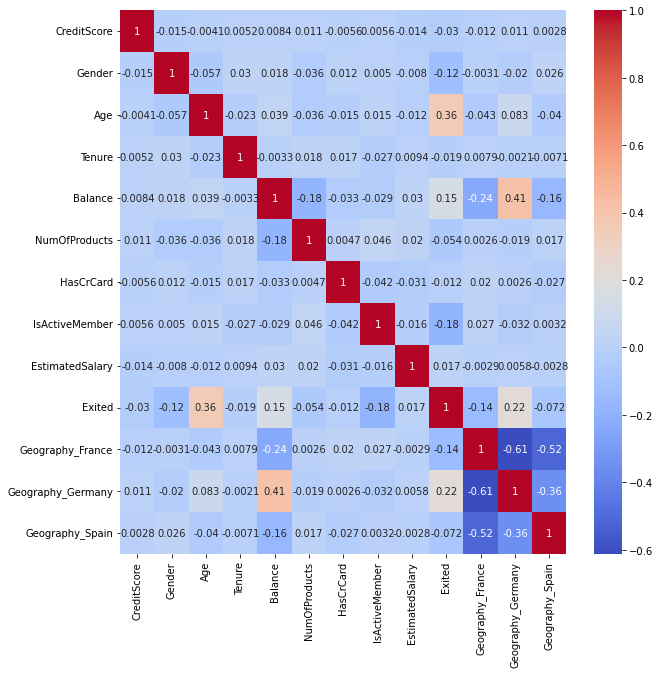

In [23]:
import seaborn as sns
corr_matrix = df_test_under.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow import keras

2023-04-27 23:56:37.605737: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-27 23:56:39.586647: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-27 23:56:39.596998: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-27 23:56:46.545131: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [34]:
def ann(X_train,y_train,X_test,y_test,loss,weights):
    model = keras.Sequential([keras.layers.Dense(26,input_shape=(12,),activation='relu'),
                             keras.layers.Dense(15,activation='relu'),
                             keras.layers.Dense(1,activation='sigmoid')])
    
    model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,class_weight=weights)
        
    print(model.evaluate(X_test,y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n ",classification_report(y_test,y_preds))
    print("\nConfusion Matrix: \n", confusion_matrix(y_test,y_preds))
    
    return y_preds

In [35]:
from sklearn.model_selection import train_test_split
X = df_test_under.drop('Exited', axis='columns')
y = df_test_under.Exited

df_test_under.Exited.value_counts()

0    2037
1    2037
Name: Exited, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15, stratify=y)
y_pred1 = ann(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

2023-04-27 23:56:51.909312: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-27 23:56:51.911109: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/100
96/96 [==============================] - 1s 2ms/step - loss: 0.6774 - accuracy: 0.6000
Epoch 2/100
96/96 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.6327
Epoch 3/100
96/96 [==============================] - 0s 1ms/step - loss: 0.6297 - accuracy: 0.6435
Epoch 4/100
96/96 [==============================] - 0s 1ms/step - loss: 0.6178 - accuracy: 0.6622
Epoch 5/100
96/96 [==============================] - 0s 1ms/step - loss: 0.6027 - accuracy: 0.6799
Epoch 6/100
96/96 [==============================] - 0s 1ms/step - loss: 0.5845 - accuracy: 0.6966
Epoch 7/100
96/96 [==============================] - 0s 1ms/step - loss: 0.5705 - accuracy: 0.7015
Epoch 8/100
96/96 [==============================] - 0s 1ms/step - loss: 0.5580 - accuracy: 0.7191
Epoch 9/100
96/96 [==============================] - 0s 1ms/step - loss: 0.5449 - accuracy: 0.7300
Epoch 10/100
96/96 [==============================] - 0s 1ms/step - loss: 0.5350 - accuracy: 0.7368
Epoch 11/

96/96 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.7866
Epoch 84/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.7820
Epoch 85/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4507 - accuracy: 0.7804
Epoch 86/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.7846
Epoch 87/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4503 - accuracy: 0.7859
Epoch 88/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.7856
Epoch 89/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4484 - accuracy: 0.7843
Epoch 90/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4479 - accuracy: 0.7849
Epoch 91/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4479 - accuracy: 0.7846
Epoch 92/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4479 - accuracy: 0.7895
Epoch 93/100


In [37]:
count_class_0, count_class_1

(7963, 2037)

In [38]:
df_class1_over = df_class_1.sample(count_class_0,replace=True)

In [39]:
df_test_over = pd.concat([df_class1_over,df_class_0],axis=0)
df_test_over.Exited.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [40]:
X = df_test_over.drop('Exited',axis='columns')
y = df_test_over.Exited

y.sample(5)

983     1
2295    1
8434    1
5092    1
7600    0
Name: Exited, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=15)
y_pred2 = ann(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 1s 1ms/step - loss: 0.6378 - accuracy: 0.6363
Epoch 2/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5817 - accuracy: 0.6995
Epoch 3/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5391 - accuracy: 0.7294
Epoch 4/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5019 - accuracy: 0.7582
Epoch 5/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4845 - accuracy: 0.7670
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4769 - accuracy: 0.7667
Epoch 7/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4734 - accuracy: 0.7675
Epoch 8/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4692 - accuracy: 0.7682
Epoch 9/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4665 - accuracy: 0.7714
Epoch 10/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4641 - accura

399/399 [==============================] - 1s 1ms/step - loss: 0.4223 - accuracy: 0.7996
Epoch 82/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4212 - accuracy: 0.7981
Epoch 83/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4216 - accuracy: 0.8001
Epoch 84/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4211 - accuracy: 0.8025
Epoch 85/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4222 - accuracy: 0.8002
Epoch 86/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4210 - accuracy: 0.7993
Epoch 87/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4204 - accuracy: 0.8013
Epoch 88/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4207 - accuracy: 0.7987
Epoch 89/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.8015
Epoch 90/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 

In [45]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 622.0 kB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 838.1 kB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [49]:
import tensorflow as tf
from imblearn.over_sampling import SMOTE

X = df.drop('Exited', axis='columns')
y = df.Exited


smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, train_size=0.8, random_state=15, stratify=y_sm)
y_train.value_counts(), y_test.value_counts()

(0    6370
 1    6370
 Name: Exited, dtype: int64,
 0    1593
 1    1593
 Name: Exited, dtype: int64)

In [51]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [52]:
y_pred3 = ann(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 1s 1ms/step - loss: 0.6454 - accuracy: 0.6322
Epoch 2/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5853 - accuracy: 0.6976
Epoch 3/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5513 - accuracy: 0.7300
Epoch 4/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5236 - accuracy: 0.7456
Epoch 5/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5040 - accuracy: 0.7550
Epoch 6/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4883 - accuracy: 0.7659
Epoch 7/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4776 - accuracy: 0.7709
Epoch 8/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.7724
Epoch 9/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.7797
Epoch 10/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4552 - accura

399/399 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.8291
Epoch 82/100
399/399 [==============================] - 0s 1ms/step - loss: 0.3770 - accuracy: 0.8272
Epoch 83/100
399/399 [==============================] - 0s 1ms/step - loss: 0.3754 - accuracy: 0.8276
Epoch 84/100
399/399 [==============================] - 0s 1ms/step - loss: 0.3753 - accuracy: 0.8281
Epoch 85/100
399/399 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.8286
Epoch 86/100
399/399 [==============================] - 0s 1ms/step - loss: 0.3757 - accuracy: 0.8292
Epoch 87/100
399/399 [==============================] - 0s 1ms/step - loss: 0.3757 - accuracy: 0.8243
Epoch 88/100
399/399 [==============================] - 0s 1ms/step - loss: 0.3731 - accuracy: 0.8264
Epoch 89/100
399/399 [==============================] - 0s 1ms/step - loss: 0.3733 - accuracy: 0.8292
Epoch 90/100
399/399 [==============================] - 0s 1ms/step - loss: 0.3712 - accuracy: 